In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros físicos e numéricos

L = 10.0  # Tamanho do espaço
Nx = 100  # Número de pontos no espaço
dx = L / (Nx - 1)  # Espaçamento no espaço

dt = 0.01  # Passo de tempo
Nt = 1000  # Número de passos de tempo
x = np.linspace(0, L, Nx)  # Vetor de posição

In [3]:
# Psi no tempo: 
shape: tuple = (Nt, Nx)
PSI = np.zeros(shape, dtype=complex)

# Condições de Contorno
PSI[0] = psi

PSI[0][0] = 0
PSI[0][-1] = 0


NameError: name 'psi' is not defined

In [ ]:
# Condições iniciais
sigma0 = 0.5  # Largura inicial do pacote de onda
x0 = L / 4.0  # Posição inicial do pacote de onda
k0 = 5.0  # Número de onda inicial
psi = np.exp(-0.5 * ((x - x0) / sigma0)**2) * np.exp(1j * k0 * x)

In [ ]:
# Potencial zero para um pacote de onda livre
V = np.zeros_like(x)

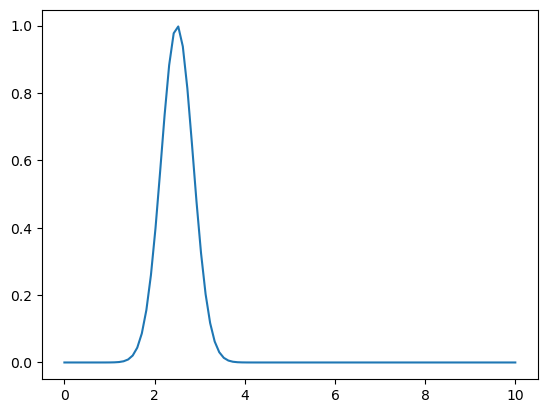

In [ ]:
plt.plot(x, np.abs(PSI[0])**2)


In [ ]:
def crank_nicolson(psi, V, dx, dt):
    Nx = len(psi)
    M = np.eye(Nx) - 0.5j * (dt / dx**2) * np.diag(np.ones(Nx - 1), -1) + 0.5j * (dt / dx**2) * np.diag(np.ones(Nx - 1), 1)
    b = np.eye(Nx) + 0.5j * (dt / dx**2) * np.diag(np.ones(Nx - 1), -1) - 0.5j * (dt / dx**2) * np.diag(np.ones(Nx - 1), 1)
    psi_new = np.linalg.solve(M, np.dot(b, psi))
    return psi_new

In [ ]:
# Evolução temporal
for t in range(Nt-1):
#     print(t)
#     psi_new = crank_nicolson(PSI[t], V, dx, dt)
    PSI[t+1][1:-1] = crank_nicolson(PSI[t][1:-1], V, dx, dt)


[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]


C:\Users\bito0\AppData\Local\Temp\ipykernel_8764\854653612.py:6: RuntimeWarning: overflow encountered in square
  plt.plot(x, np.abs(PSI[i])**2, label=f'{i}')


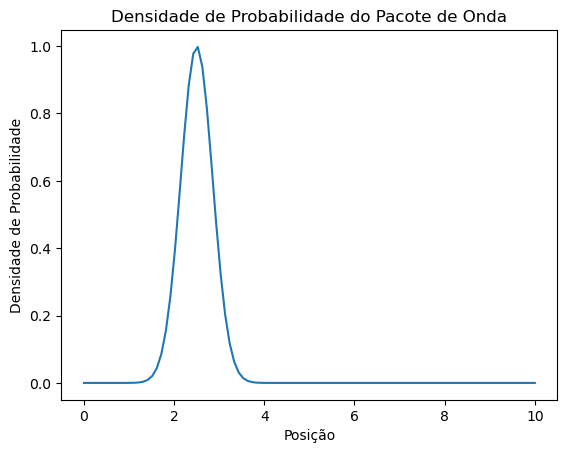

In [ ]:
indexes = [i for i in range(Nt) if i % 100 == 0]
print(indexes)
# Plot do resultado
for i in indexes:

    plt.plot(x, np.abs(PSI[i])**2, label=f'{i}')
    plt.title("Densidade de Probabilidade do Pacote de Onda")
    plt.xlabel("Posição", )
    plt.ylabel("Densidade de Probabilidade")
    